In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix


#PART1

In [ ]:
df=pd.read_csv('/content/advertising.csv')
df

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


#1a

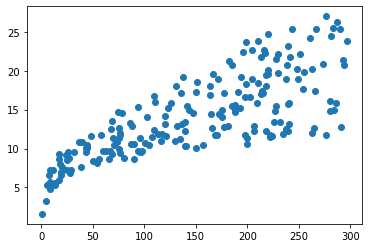

In [ ]:
plt.scatter(df['TV'],df['Sales'])

#1b

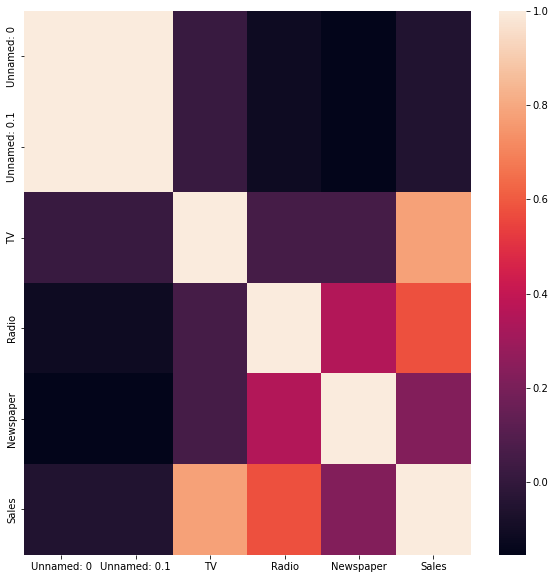

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

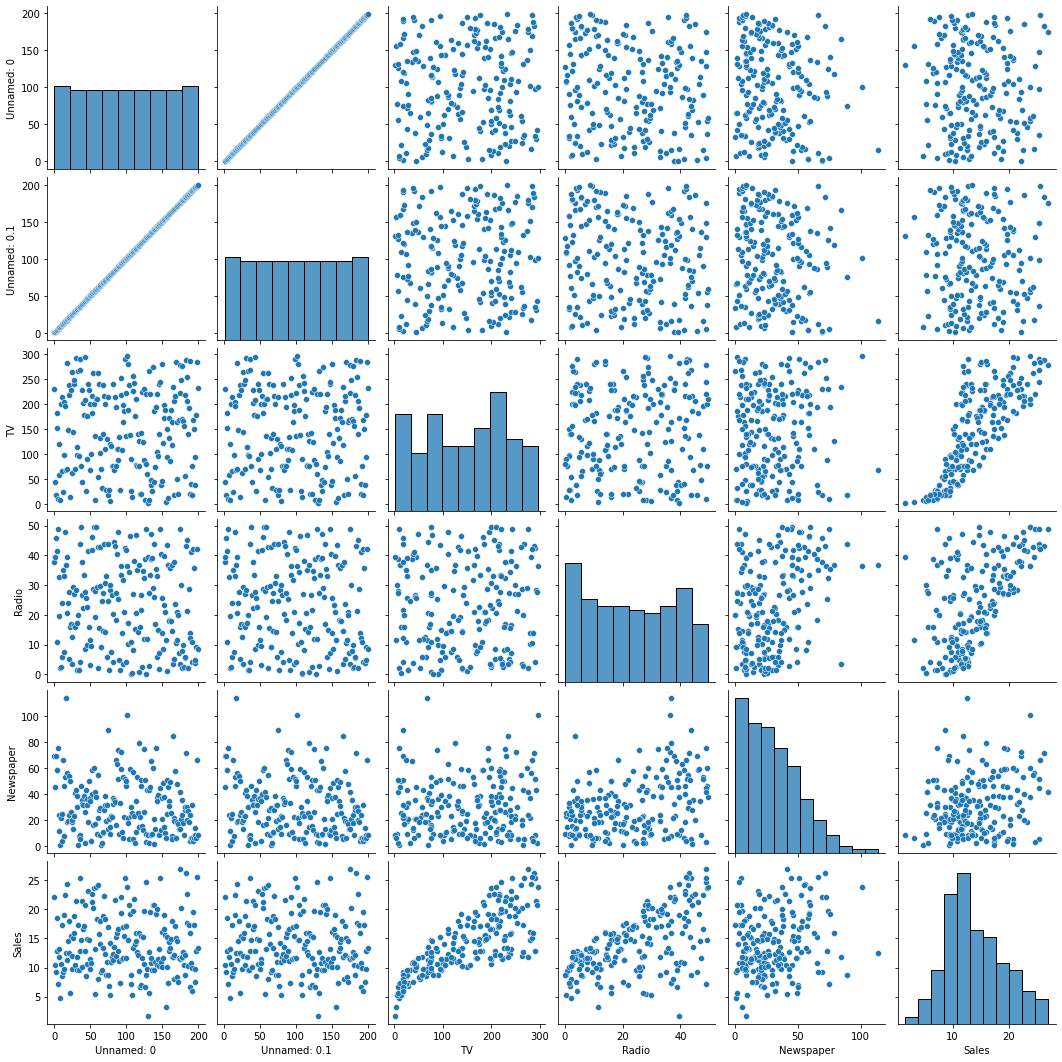

In [ ]:
sns.pairplot(df)

#2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["TV"]], df["Sales"], test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
m=lr.coef_
c=lr.intercept_
print("Slope",m)
print("Intercept",c)

Slope [0.04553173]
Intercept 7.19994751739598


#3

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([12.1993317 , 16.74339857, 14.8674912 , 15.5140418 , 14.79464043,
       11.17031456, 20.29487367,  7.59607359, 20.39049031,  9.16236517,
       12.80490374, 11.77133342, 17.20782223, 10.63759329, 15.77812585,
       14.64438572,  9.47653412,  8.42019794,  8.45207015, 18.13211639,
        7.58241407, 12.67286172, 13.09175365, 17.58118244, 17.05301434,
       14.99953323, 17.64948003,  9.63589518, 16.79803664, 16.61590972,
        7.55509503, 13.3558377 , 15.0541713 , 15.43208468,  8.33824082,
       20.14461895,  8.36555986,  8.09236947, 12.53626652, 16.19701778])

In [58]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.3051948051948052
MSE: 0.3051948051948052
RMSE: 0.5524443910429403


#4

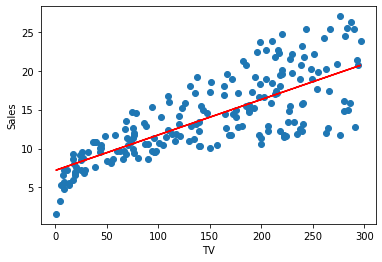

In [ ]:
plt.scatter(df["TV"], df["Sales"])
plt.plot(df["TV"], lr.predict(df[["TV"]]), color="red")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()


#5

In [67]:
linear_model = ols('TV ~ Sales',
                   data=df).fit()

In [68]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     TV   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        11:23:19   Log-Likelihood:                -1079.2
No. Observations:                 200   AIC:                             2162.
Df Residuals:                     198   BIC:                             2169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.4502     10.897     -3.070      0.0

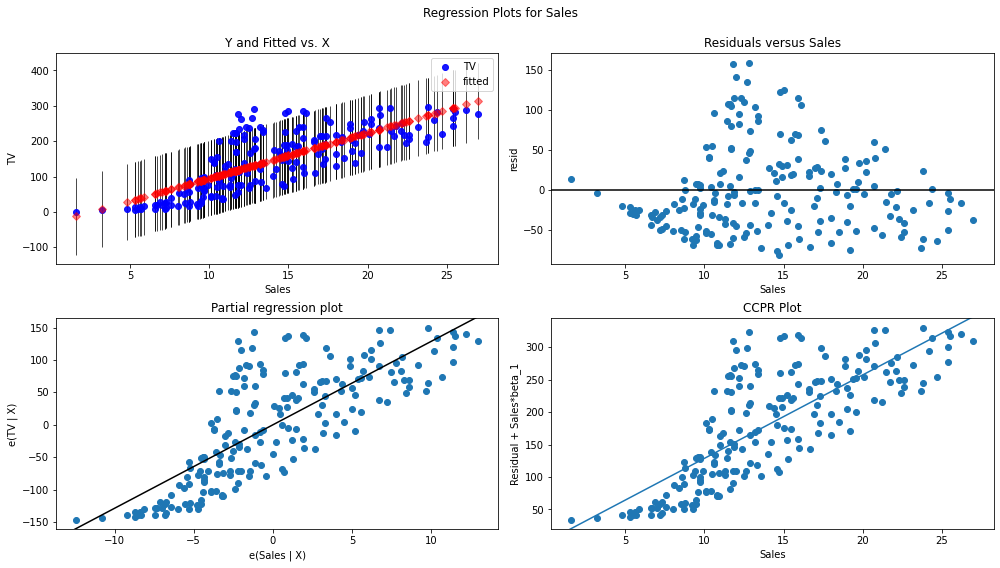

In [69]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(linear_model,
                                    'Sales',
                                    fig=fig)

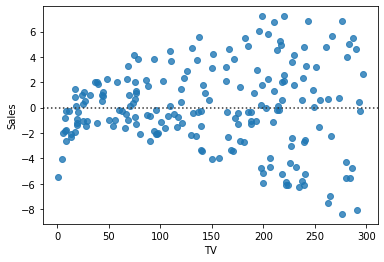

In [70]:
sns.residplot(x='TV', y='Sales', data=df)
plt.show()


As from the graph we can see that the data points are spreaded across the whole graph hence the variance is not constant and therefore heteroscedascity is present.

#PART2

#2a



In [ ]:
df1=pd.read_csv('/content/pima-indians-diabetes.csv',names=["A", "B", "C", "D", "E", "F", "G", "H", "label"])
df1

,A,B,C,D,E,F,G,H,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df1.to_csv(r"C:\Users\Jithendra\Documents\Datasets\FODS\pima-indians-diabetes1.csv")

In [ ]:
df1.describe()

,A,B,C,D,E,F,G,H,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
X = df1.drop("label", axis=1)
y = df1["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#2b

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#2c

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [62]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
690,0,1
202,0,0
512,0,0
48,1,0
714,0,0
...,...,...
625,0,0
308,1,0
631,0,0
165,1,0


#2d

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[76 17]
 [28 33]]


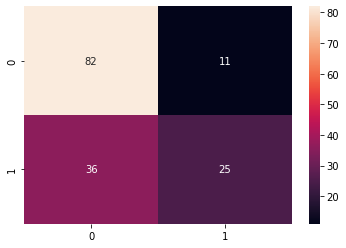

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cbar=True,annot=True)

#2e

In [ ]:
import numpy as np
mean_errors = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mean_error = np.mean(y_pred != y_test)
    mean_errors.append(mean_error)


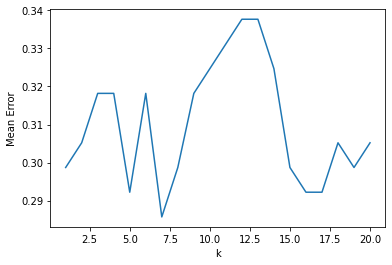

In [ ]:
plt.plot(k_range, mean_errors)
plt.xlabel("k")
plt.ylabel("Mean Error")
plt.show()

In [64]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.66
Sensitivity :  0.5409836065573771
Specificity :  0.5409836065573771
F1 score :  0.5945945945945946
Accuracy :  0.7077922077922078
